## OMNI DATA DOWNLOAD

This notebook has code to download data from the OMNI Mission, by using pyspedas. This info procedes from the cite itself: 

    PySPEDAS is an implementation of the Space Physics Environment Data Analysis Software (SPEDAS) framework in Python.

    The SPEDAS framework is written in IDL and contains data loading, data analysis and data plotting tools for various scientific missions     (NASA, NOAA, etc.) and ground magnetometers.

    PySPEDAS and pyTplot make creating multi-mission, multi-instrument figures simple, e.g., to create a figure showing magnetometer data       from Solar Orbiter, Parker Solar Probe, MMS, and THEMIS,

There is a .py file on the github repository wich parses a txt file and process the information on temporary variables, although this notebook has plenty of more options.


In [3]:
import pyspedas

In [20]:
import pyspedas
from pyspedas import tplot
#As a commentary: you may want to check the documentation to see how many satellites are available, 'cause by changing .omni to .goes
# You can retrieve info from another satellite. :)
omni_vars = pyspedas.projects.omni.data(trange=['2025-01-01', '2025-01-10'],datatype='1min', level='hro',
prefix='', suffix='', get_support_data=False, get_ignore_data=False, varformat=None, varnames=[], 
downloadonly=False, notplot=False, no_update=False, time_clip=True, force_download=False)

12-Jun-25 10:35:16: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2025/
12-Jun-25 10:35:16: File is current: omni_data/hro_1min/2025/omni_hro_1min_20250101_v01.cdf
12-Jun-25 10:35:17: Floating point data values for variable PC_N_INDEX are all fillval (9.999900e+02)


In [5]:
import pyspedas

data_dict = pyspedas.projects.omni.data(trange=['2013-11-5', '2013-11-6'], 
                                        datatype='5min', 
                                        notplot=True)
#pa ver cuáles son las opciones q no aparecen en la documentación. 
print(data_dict.keys())


11-Jun-25 12:46:01: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_5min/2013/
11-Jun-25 12:46:02: Downloading https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_5min/2013/omni_hro_5min_20131101_v01.cdf to omni_data/hro_5min/2013/omni_hro_5min_20131101_v01.cdf
11-Jun-25 12:46:22: Download complete: omni_data/hro_5min/2013/omni_hro_5min_20131101_v01.cdf


dict_keys(['IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'percent_interp', 'Timeshift', 'RMS_Timeshift', 'Time_btwn_obs', 'F', 'BX_GSE', 'BY_GSE', 'BZ_GSE', 'BY_GSM', 'BZ_GSM', 'RMS_SD_B', 'RMS_SD_fld_vec', 'flow_speed', 'Vx', 'Vy', 'Vz', 'proton_density', 'T', 'Pressure', 'E', 'Beta', 'Mach_num', 'Mgs_mach_num', 'x', 'y', 'z', 'BSN_x', 'BSN_y', 'BSN_z', 'AE_INDEX', 'AL_INDEX', 'AU_INDEX', 'SYM_D', 'SYM_H', 'ASY_D', 'ASY_H', 'PC_N_INDEX', 'PR-FLX_10', 'PR-FLX_30', 'PR-FLX_60'])


11-Jun-25 13:23:39: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_5min/2025/
11-Jun-25 13:23:40: File is current: omni_data/hro_5min/2025/omni_hro_5min_20250101_v01.cdf


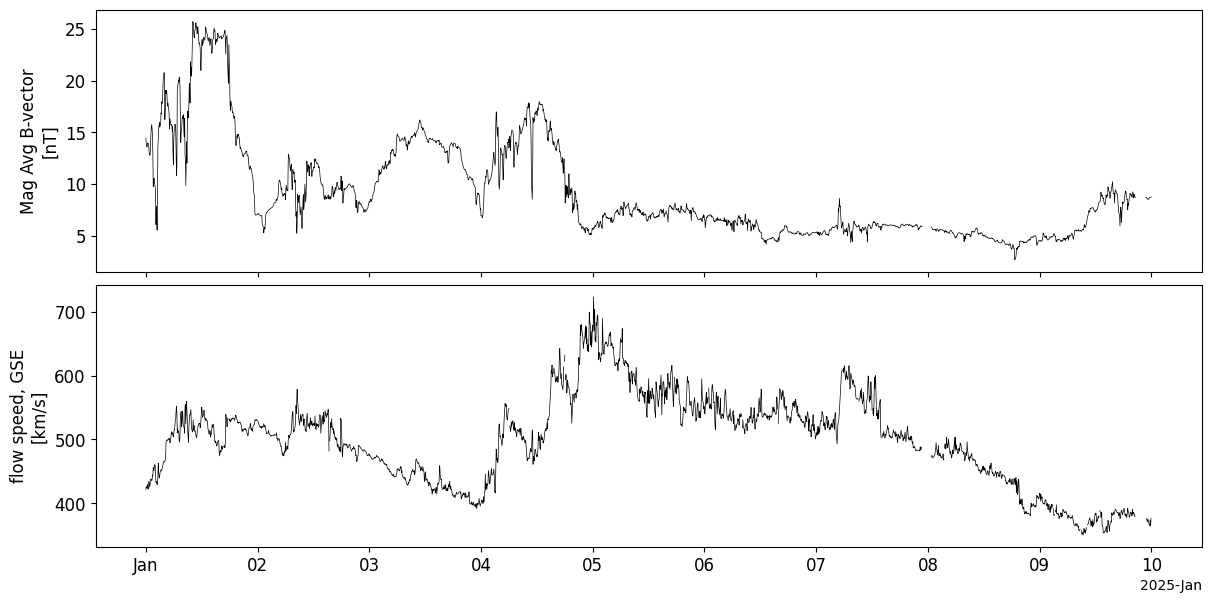

In [11]:
import pyspedas
from pyspedas import tplot

#Download and load the necessary variables with a 5min resolution, can be changed to 1min
# Descargar y cargar las variables necesarias con resolución de 5min, puede ser cambiado a 1min
omni_vars = pyspedas.projects.omni.data(
    trange=['2025-01-01', '2025-01-10'],
    datatype='5min',
    varnames=['F', 'flow_speed'],  # <-- Aquí se usa 'F' en lugar de 'IMF'
    time_clip=True
)

# Visualizar los datos
tplot(['F', 'flow_speed'])  # <-- También aquí se cambia 'IMF' por 'F'



### information about date
trange (list of str, optional) – Time range of interest specified as [‘starttime’, ‘endtime’] with the format ‘YYYY-MM-DD’ or ‘YYYY-MM-DD/hh:mm:ss’ 

In [13]:
import pyspedas
from pyspedas import tplot
import pytplot
import pandas as pd

# Descargar datos de 5 minutos, con variables relevantes
pyspedas.projects.omni.data(
    trange=['2025-01-01', '2025-02-01'],  # cambia el rango si deseas más días
    datatype='1min',
    varnames=['F', 'flow_speed'],
    notplot=False, time_clip=True
)

# Extraer datos de magnitud del campo magnético (F) y velocidad del flujo
f_data = pytplot.get_data('F')
flow_data = pytplot.get_data('flow_speed')

# Convertir a DataFrame
df = pd.DataFrame({
    'Time': pd.to_datetime(f_data.times, unit='s', origin='unix'),
    'IMF_nT': f_data.y,
    'FlowSpeed_kms': flow_data.y
})

# Guardar a CSV
df.to_csv('omni_01_02_1min_IMF_nT_FlowSpeed_kms.csv', index=False)


11-Jun-25 13:45:31: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2025/
11-Jun-25 13:45:32: File is current: omni_data/hro_1min/2025/omni_hro_1min_20250101_v01.cdf


# Testing Section

In [ ]:
import csv
import tempfile

def write_csv(csvfile):
    writer = csv.DictWriter(csvfile, fieldnames=['foo', 'bar'])
    writer.writeheader()
    writer.writerow({'foo': 1, 'bar': 2})

def test_write_csv():
    with tempfile.NamedTemporaryFile(mode='w', delete=True) as csvfile:
        write_csv(csvfile)
    with open(csvfile.name) as csvfile:
        reader = csv.DictReader(csvfile)

In [32]:
import pyspedas
from pyspedas import tplot
import pytplot
import pandas as pd
from datetime import datetime


fechas_a_parsear = input('Hola, escribe el nombre del archivo .txt con las fechas que deseas procesar: ' )

with open(fechas_a_parsear, "r") as dates:
    dates.readlines()
    fechas = []
    for i in dates:
        fecha = row.split(',', 1)[0]
        try:        
            date = datetime.strptime(date, '%m/%d/%Y')
            dates.append(date)
        except ValueError:
            continue

    


# aquí va la descarga con las fechas indicadas, posteriormente debe ser parseada de un txt!!!!!!!!!!
pyspedas.projects.omni.data(
    trange=['2025-01-01', '2025-02-01'],
    datatype='1min',
    varnames=['F', 'flow_speed'],
    notplot=False, 
    time_clip=True
)

# 2. Extraer datos a arrays en memoria
f_data = pytplot.get_data('F')
flow_data = pytplot.get_data('flow_speed')

# 3. Crear DataFrame en memoria
df = pd.DataFrame({
    'Time': pd.to_datetime(f_data.times, unit='s', origin='unix'), #
    'IMF_nT': f_data.y,
    'FlowSpeed_kms': flow_data.y
})

################################################################
#La idea de este cambio en la parte de abajo es no exportar la información como un csv sino dejarla temporal como viene de 
#pytplot y solo meterla en variables. Así que cuando el programa se cierre toda la información se perderá y solo quedará el output.
#Mi recomendación es guardar los outputs en algún lado, y si no, si se desea guardar la información en un csv, entonces ejecutar
#la celda de arriba. 
################################################################
# Ahora puedes trabajar directamente con el DataFrame df
# I.E. Analisis: 
mean_imf = df['IMF_nT'].mean()
max_speed = df['FlowSpeed_kms'].max()

print(f"IMF promedio: {mean_imf} nT")
print(f"Velocidad máxima: {max_speed} km/s")


Hola, escribe el nombre del archivo .txt con las fechas que deseas procesar:  dates.txt


12-Jun-25 12:51:23: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2025/
12-Jun-25 12:51:24: File is current: omni_data/hro_1min/2025/omni_hro_1min_20250101_v01.cdf


IMF promedio: 7.310574054718018 nT
Velocidad máxima: 726.5 km/s


'/home/claire/mineria/UNIVAP'